In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
# from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
# mean_squared_error, mean_absolute_error, r2_score)

In [5]:
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, HuberRegressor
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
# from sklearn.svm import SVR, SVC
# from sklearn.naive_bayes import GaussianNB
# import joblib

In [6]:
#Import the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML FINAL PROJECT/test.csv")

In [7]:
# top 5 entries
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [8]:
#Last 5 entries
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [9]:
#Check for columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [10]:
#Check for data types
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [11]:
#Check for null values
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,7498
Num_Bank_Accounts,0


In [12]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
#Check description
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [14]:
#Check description
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,50000,50000,50000,44985,50000,50000,50000,50000,42502.000000,50000.000000,...,48965.000000,50000,50000,50000.000000,45530,50000,50000.000000,47729,50000,49438
unique,50000,12500,4,10139,976,12501,16,16121,NaN,NaN,...,NaN,4,12685,NaN,399,3,NaN,45450,7,49433
top,0x25fc1,CUS_0x942c,September,Stevex,39,#F%$D@*&8,_______,72524.2,NaN,NaN,...,NaN,Standard,460.46,NaN,20 Years and 1 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,4,12500,22,1493,2828,3438,8,NaN,NaN,...,NaN,18379,12,NaN,254,26158,NaN,2175,12694,6
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4182.004291,16.838260,...,30.080200,NaN,NaN,32.279581,NaN,NaN,1491.304305,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3174.109304,116.396848,...,196.984121,NaN,NaN,5.106238,NaN,NaN,8595.647887,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,0.000000,NaN,NaN,20.509652,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.188333,3.000000,...,4.000000,NaN,NaN,28.061040,NaN,NaN,32.222388,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3086.305000,6.000000,...,7.000000,NaN,NaN,32.280390,NaN,NaN,74.733349,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5934.189094,7.000000,...,10.000000,NaN,NaN,36.468591,NaN,NaN,176.157491,NaN,NaN,NaN


In [15]:
# Drop unnecessary columns
df_clean = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Month'],inplace=True)

In [16]:
numeric_object_cols = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Outstanding_Debt',
    'Changed_Credit_Limit',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in numeric_object_cols:
    if col in df.columns:
        # Remove everything except digits, minus sign, and dot
        df[col] = df[col].astype(str).str.replace(r'[^0-9\.-]', '', regex=True)
        # Convert to numeric, invalid values -> NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


In [18]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


In [19]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows that are NOT outliers in any numeric column
mask = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask].reset_index(drop=True)


In [20]:
print("Rows after outlier removal:", df.shape[0])


Rows after outlier removal: 29826


In [21]:
print(df.isnull().sum())


Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64


In [22]:
print(df.dtypes)



Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object


In [23]:
print(df.describe())

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count   29826.000000           29826.000000       29826.000000   
mean    38459.652078            3174.281892           5.318648   
std     25314.499836            1943.712960           2.516571   
min      7005.930000             303.645417          -1.000000   
25%     18237.780000            1646.602500           3.000000   
50%     32112.695000            3037.088333           5.000000   
75%     54517.415000            3832.298333           7.000000   
max    148699.320000           10636.946667          11.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     29826.000000   29826.000000  29826.000000         29826.000000   
mean          5.459163      14.255918      3.430363            19.446423   
std           2.009723       8.473153      2.287485            12.598235   
min           0.000000       1.000000      0.000000            -5.000000   
25%           4.000000   

# Exploratory Data Analysis

### Univariate Analysis

Numerical Columns Distribution

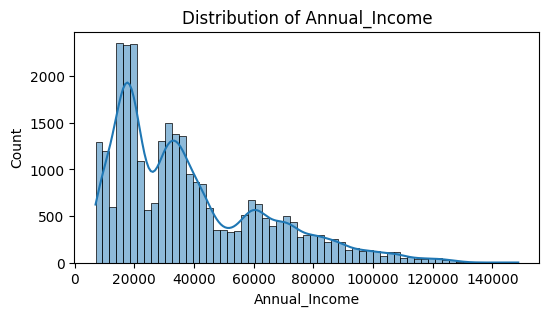

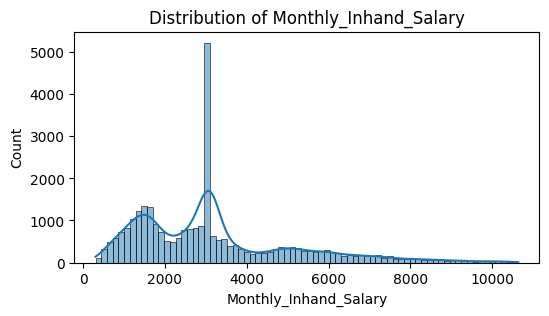

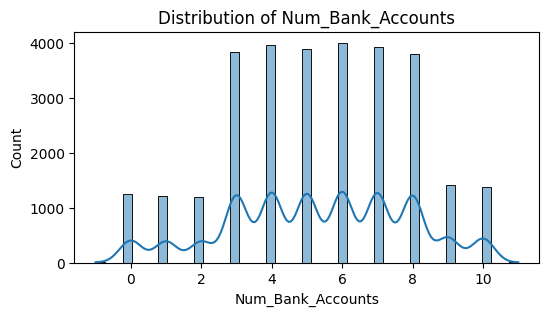

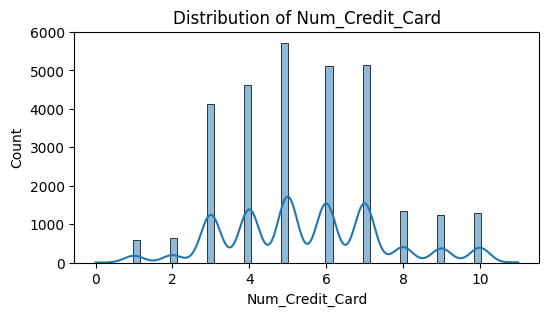

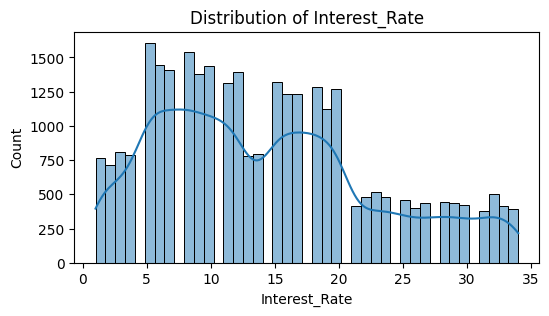

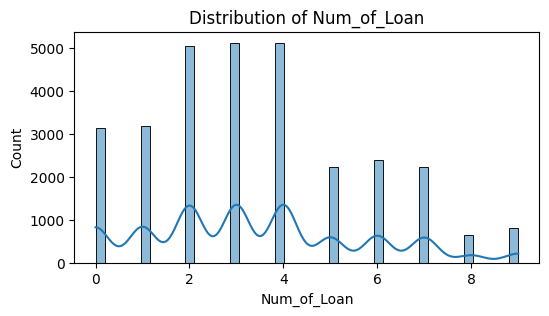

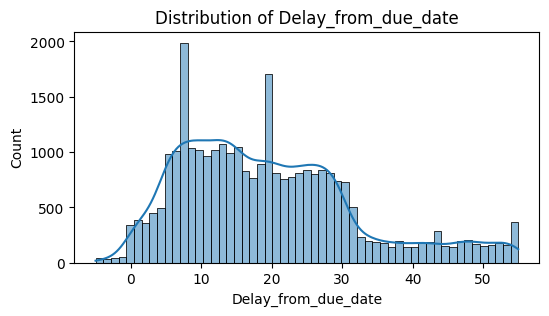

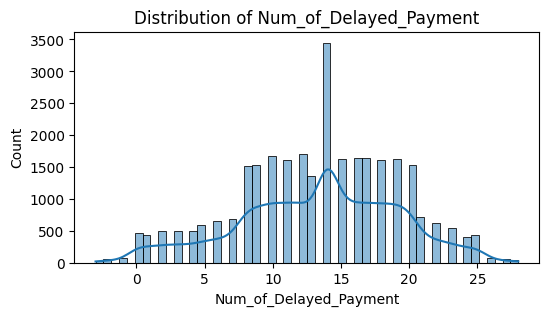

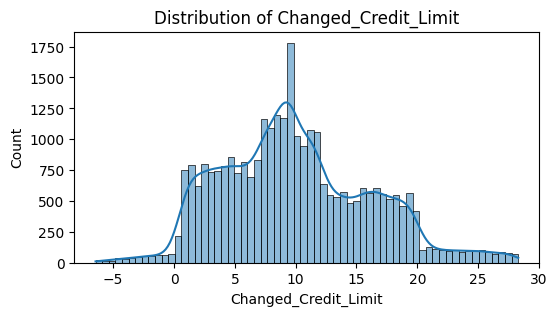

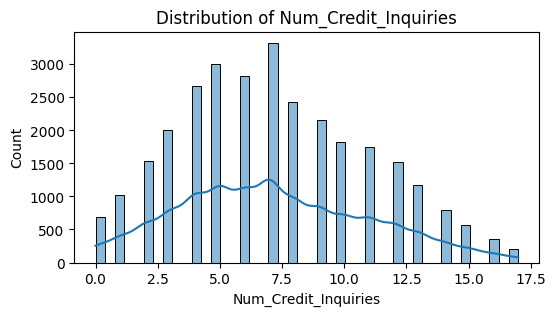

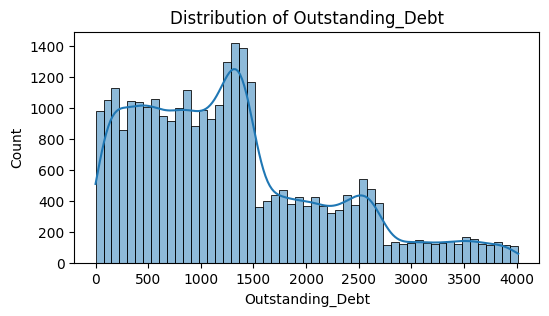

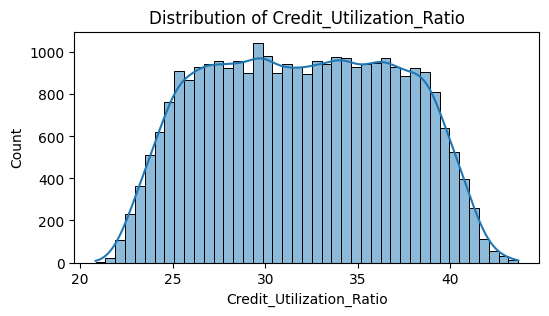

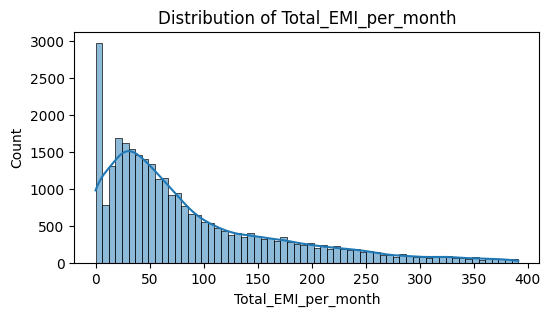

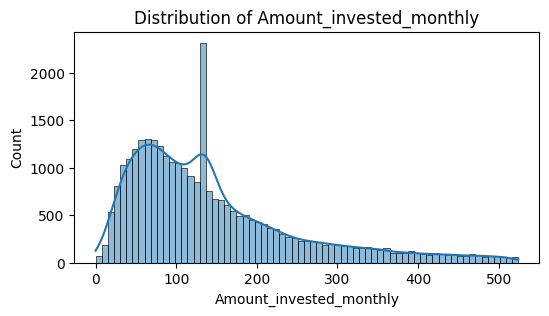

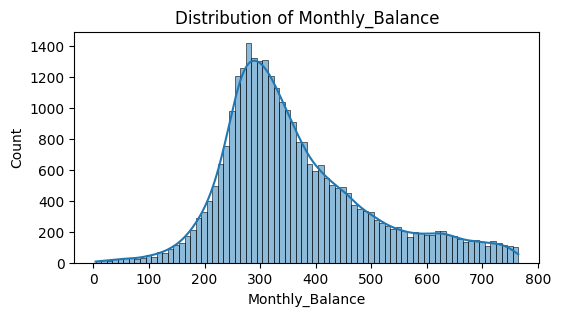

In [24]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Bivariate Analysis

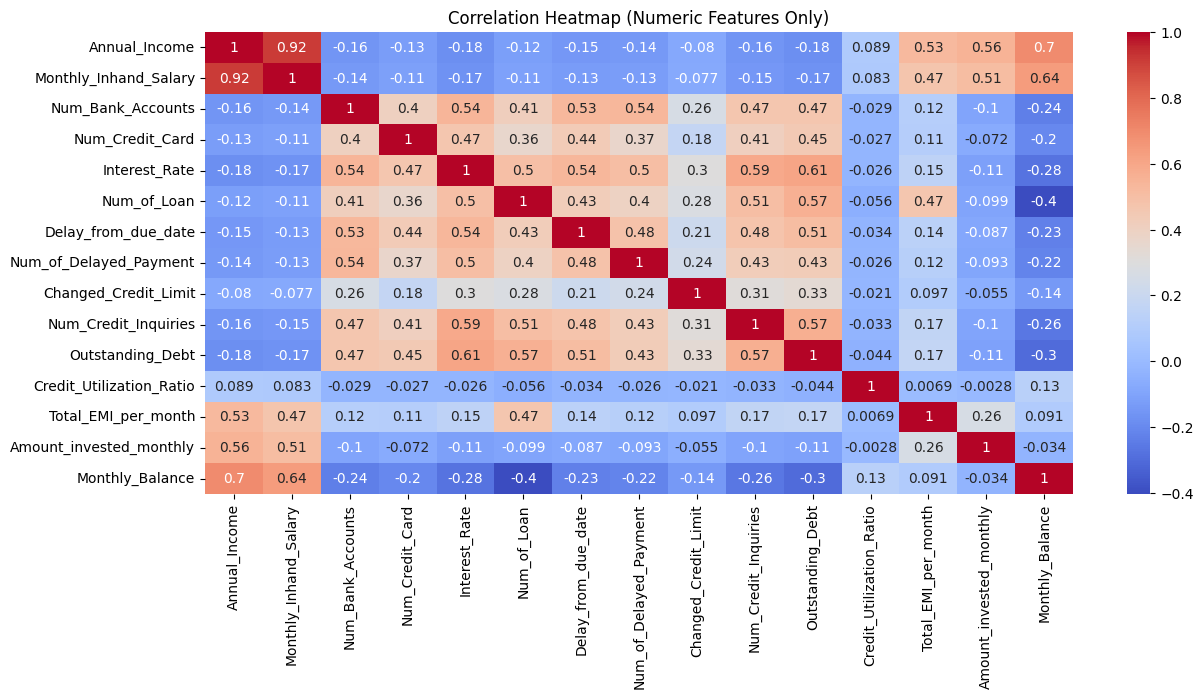

In [25]:
plt.figure(figsize=(14,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


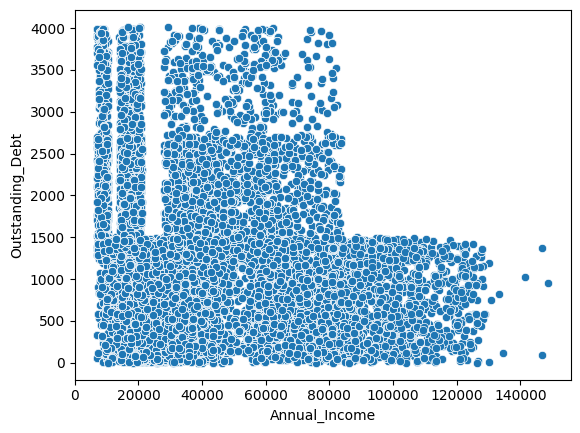

In [26]:
sns.scatterplot(data=df, x='Annual_Income', y='Outstanding_Debt')
plt.show()

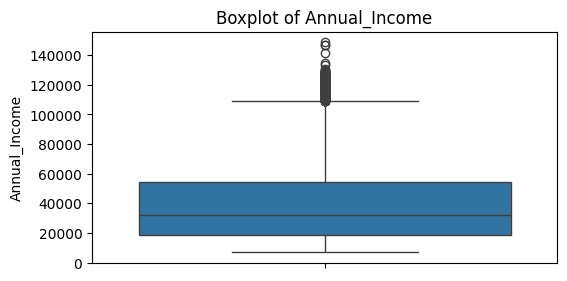

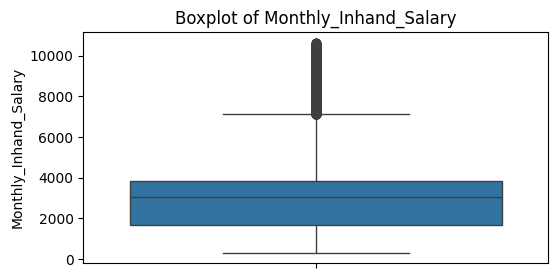

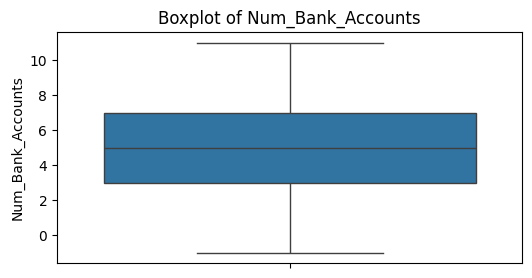

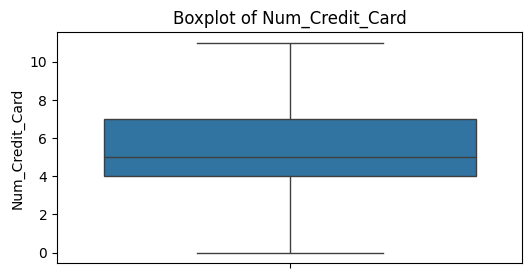

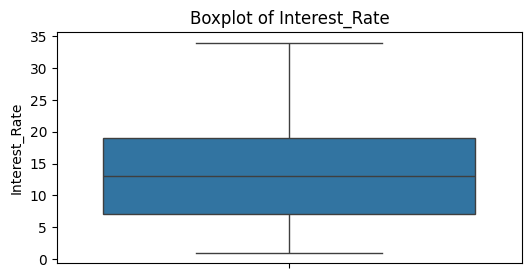

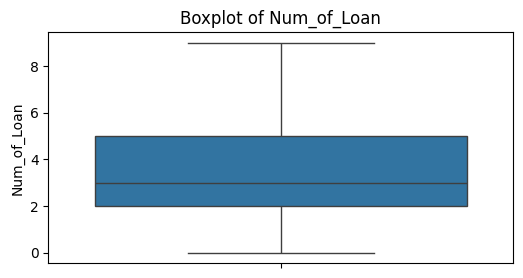

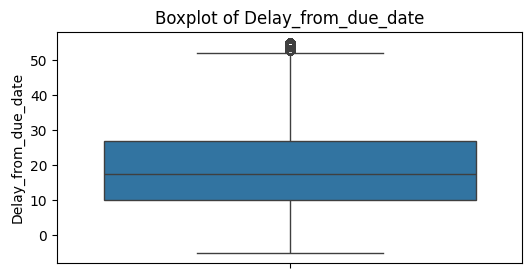

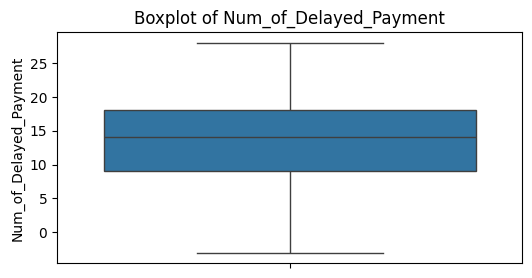

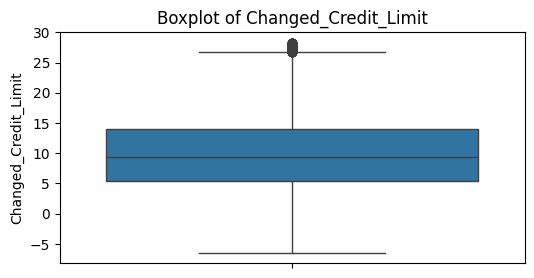

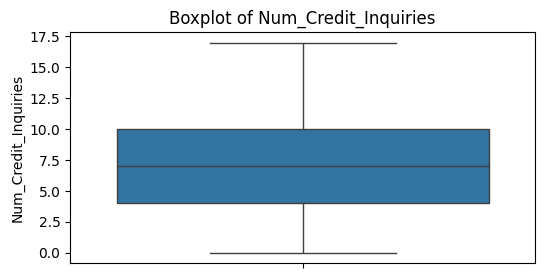

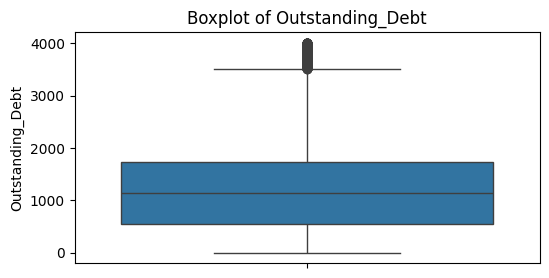

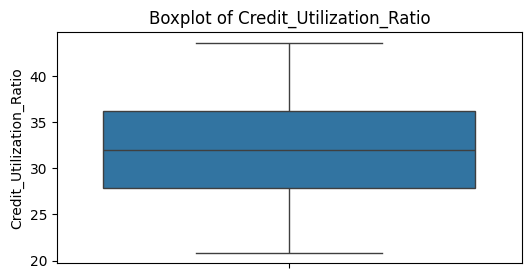

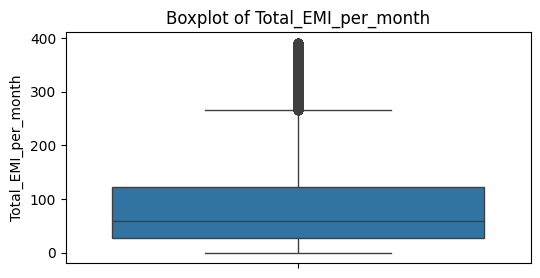

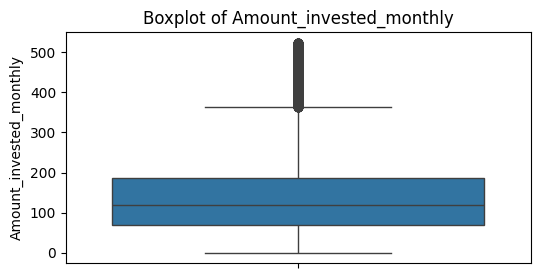

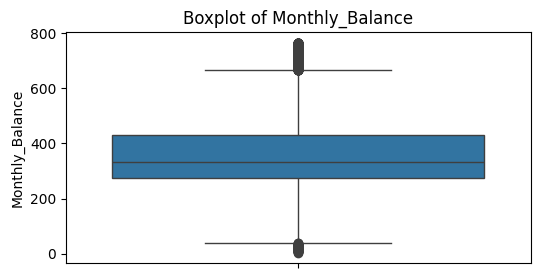

In [27]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Featrure Engineering

In [28]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['Age', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')


In [29]:
import re
from sklearn.preprocessing import LabelEncoder

# ================== CLEAN & ENCODE ================== #

# 1) Clean 'Age' column (convert object → numeric)
if df['Age'].dtype == 'O':
    df['Age_clean'] = df['Age'].astype(str).str.extract(r'(\d+)', expand=False)
    df['Age_clean'] = pd.to_numeric(df['Age_clean'], errors='coerce')
    df['Age_clean'].fillna(df['Age_clean'].median(), inplace=True)
    df['Age'] = df['Age_clean']
    df.drop(columns=['Age_clean'], inplace=True)

# 2) Convert 'Credit_History_Age' text → total months (numeric)
def parse_credit_history_age(val):
    """
    Examples:
    '22 Years and 10 Months' -> 22*12 + 10
    '10 Years' -> 10*12
    '5 Months' -> 0*12 + 5
    'NaN' or weird -> np.nan
    """
    val = str(val)
    nums = re.findall(r'\d+', val)
    if len(nums) == 0:
        return np.nan
    years = int(nums[0])
    months = int(nums[1]) if len(nums) > 1 else 0
    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(parse_credit_history_age)
df['Credit_History_Age'] = pd.to_numeric(df['Credit_History_Age'], errors='coerce')
df['Credit_History_Age'].fillna(df['Credit_History_Age'].median(), inplace=True)
df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)

# 3) Encode categorical columns

# Re-detect categorical (object) columns AFTER conversions
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns before encoding:", cat_cols)

# Ordinal columns to Label Encode
ordinal_cols = []
if 'Payment_of_Min_Amount' in df.columns:
    ordinal_cols.append('Payment_of_Min_Amount')
if 'Credit_Mix' in df.columns:
    ordinal_cols.append('Credit_Mix')

le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

# Nominal columns to One-Hot Encode
nominal_cols = [col for col in cat_cols if col not in ordinal_cols]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# 4) Final check
print("\n===== AFTER CLEANING & ENCODING =====")
print(df.dtypes)
print("\nRemaining object columns (if any):")
print(df.select_dtypes(include=['object']).columns)

# ================== END ================== #


Categorical columns before encoding: ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

===== AFTER CLEANING & ENCODING =====
Age                                                     int64
Annual_Income                                         float64
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                       int64
Num_Credit_Card                                         int64
                                                       ...   
Payment_Behaviour_High_spent_Medium_value_payments       bool
Payment_Behaviour_High_spent_Small_value_payments        bool
Payment_Behaviour_Low_spent_Large_value_payments         bool
Payment_Behaviour_Low_spent_Medium_value_payments        bool
Payment_Behaviour_Low_spent_Small_value_payments         bool
Length: 4968, dtype: object

Remaining object columns (if any):
Index([], dtype='object')


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Rebuild target and features cleanly
y_raw = df['Credit_Mix']          # whatever it is right now (int, float, string)
y, y_classes = pd.factorize(y_raw)  # convert to 0,1,2,... discrete classes

X = df.drop(columns=['Credit_Mix'])

# New train–test split (for classification → use stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2025,
)

print("y_train dtype:", y_train.dtype)
print("Unique labels in y_train:", np.unique(y_train))
print("Class mapping (index → original label):", dict(enumerate(y_classes)))


y_train dtype: int64
Unique labels in y_train: [0 1 2 3]
Class mapping (index → original label): {0: 1, 1: 3, 2: 2, 3: 0}



======== Training Logistic Regression ========
Test Accuracy: 0.6971 | Precision: 0.6514 | Recall: 0.6971 | F1: 0.6709 | CV Acc: 0.6820

======== Training Decision Tree ========
Test Accuracy: 0.6584 | Precision: 0.6597 | Recall: 0.6584 | F1: 0.6590 | CV Acc: 0.6558

======== Training Random Forest ========
Test Accuracy: 0.7712 | Precision: 0.6756 | Recall: 0.7712 | F1: 0.7063 | CV Acc: 0.7586

======== Training AdaBoost ========
Test Accuracy: 0.6520 | Precision: 0.5681 | Recall: 0.6520 | F1: 0.5867 | CV Acc: 0.6333

======== Training Naive Bayes ========
Test Accuracy: 0.6914 | Precision: 0.6015 | Recall: 0.6914 | F1: 0.6258 | CV Acc: 0.6818

======== Training XGBoost ========
Test Accuracy: 0.7633 | Precision: 0.6532 | Recall: 0.7633 | F1: 0.6853 | CV Acc: 0.7562

================ MODEL COMPARISON ================
                 Model  Test Accuracy  Precision (weighted)  \
2        Random Forest       0.771203              0.675556   
5              XGBoost       0.763326      

<Figure size 500x400 with 0 Axes>

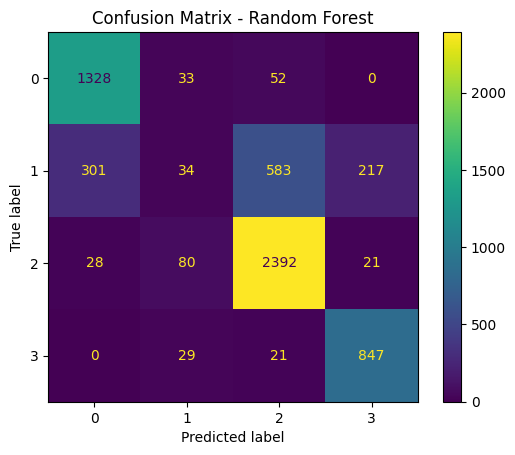


===== TOP 15 FEATURE IMPORTANCES (Best Model) =====
Interest_Rate               0.070657
Num_of_Delayed_Payment      0.067521
Num_Bank_Accounts           0.062803
Delay_from_due_date         0.060012
Changed_Credit_Limit        0.053680
Outstanding_Debt            0.053009
Credit_History_Age          0.046223
Payment_of_Min_Amount       0.045692
Num_Credit_Inquiries        0.036810
Monthly_Balance             0.035337
Num_Credit_Card             0.034235
Amount_invested_monthly     0.031935
Credit_Utilization_Ratio    0.031770
Num_of_Loan                 0.030531
Annual_Income               0.030246
dtype: float64


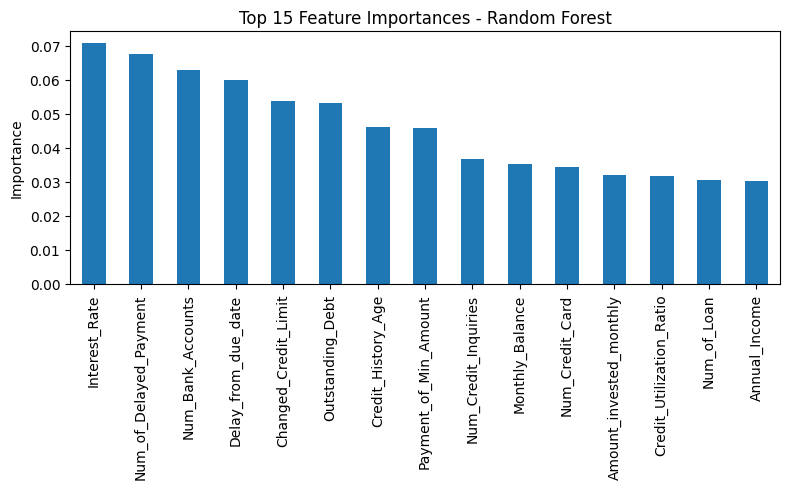

In [32]:
# ===================== 5) MODEL TRAINING & EVALUATION ===================== #

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# 1) Define models (fast / reasonably fast ones only)

models = {
    "Logistic Regression": make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=2000)
    ),
    "Decision Tree": DecisionTreeClassifier(random_state=2025),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=2025,
        n_jobs=-1
    ),
    "AdaBoost": AdaBoostClassifier(
        random_state=2025
    ),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(
        n_estimators=200,          # lighter than 300
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=2025,
        n_jobs=-1
    )
}

results = []

# 2) Train, predict, and evaluate each model

for name, model in models.items():
    print(f"\n======== Training {name} ========")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Cross-validation on train set (accuracy)
    cv_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    print(f"Test Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | CV Acc: {cv_acc:.4f}")
    results.append([name, acc, prec, rec, f1, cv_acc])

# 3) Results summary table

results_df = pd.DataFrame(
    results,
    columns=["Model", "Test Accuracy", "Precision (weighted)", "Recall (weighted)", "F1 (weighted)", "CV Accuracy"]
)

print("\n================ MODEL COMPARISON ================")
print(results_df.sort_values(by="Test Accuracy", ascending=False))

# 4) Pick best model based on Test Accuracy

best_row = results_df.sort_values(by="Test Accuracy", ascending=False).iloc[0]
best_model_name = best_row["Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(best_row)

# 5) Detailed evaluation for best model

y_best_pred = best_model.predict(X_test)

print("\n===== CLASSIFICATION REPORT (Best Model) =====")
print(classification_report(y_test, y_best_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(5,4))
disp.plot(values_format='d')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

# 6) Feature Importance for tree-based models (if available)

if hasattr(best_model, "feature_importances_"):  # e.g. RandomForest, XGB without pipeline
    importances = best_model.feature_importances_
    feature_names = X_train.columns
elif hasattr(best_model, "named_steps") and 'randomforestclassifier' in best_model.named_steps:
    importances = best_model.named_steps['randomforestclassifier'].feature_importances_
    feature_names = X_train.columns
elif hasattr(best_model, "named_steps") and 'xgbclassifier' in best_model.named_steps:
    importances = best_model.named_steps['xgbclassifier'].feature_importances_
    feature_names = X_train.columns
else:
    importances = None

if importances is not None:
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)
    print("\n===== TOP 15 FEATURE IMPORTANCES (Best Model) =====")
    print(feat_imp)

    plt.figure(figsize=(8,5))
    feat_imp.plot(kind='bar')
    plt.title(f"Top 15 Feature Importances - {best_model_name}")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importance not available for this model (e.g., Logistic Regression, Naive Bayes, or pipeline-only models).")

# ===================== END OF MODEL TRAINING & EVALUATION ===================== #


🔍 Starting Grid Search for Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

✅ Grid Search Completed
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Accuracy: 0.7566220044985394

===== TUNED RANDOM FOREST PERFORMANCE ON TEST SET =====
Test Accuracy: 0.7707
Precision (weighted): 0.6765
Recall (weighted): 0.7707
F1-score (weighted): 0.7035

===== CLASSIFICATION REPORT (Tuned RF) =====
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1413
           1       0.22      0.03      0.05      1135
           2       0.78      0.95      0.85      2521
           3       0.77      0.95      0.85       897

    accuracy                           0.77      5966
   macro avg       0.64      0.72      0.66      5966
weighted avg       0.68      0.77      0.70      5966



<Figure size 500x400 with 0 Axes>

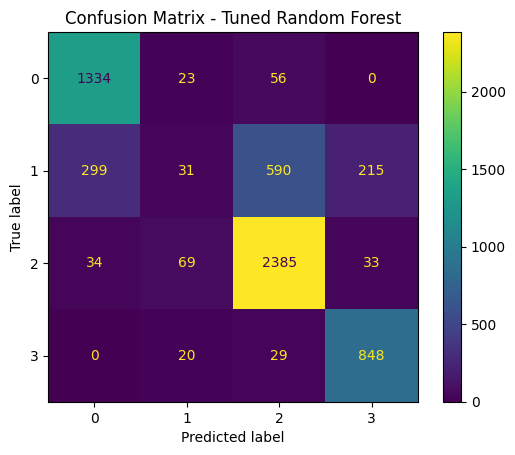


===== TOP 15 FEATURE IMPORTANCES (Tuned RF) =====
Num_of_Delayed_Payment      0.068258
Interest_Rate               0.064981
Outstanding_Debt            0.063436
Num_Bank_Accounts           0.058558
Delay_from_due_date         0.054973
Credit_History_Age          0.050396
Changed_Credit_Limit        0.044675
Num_Credit_Inquiries        0.041909
Payment_of_Min_Amount       0.041234
Num_of_Loan                 0.040872
Monthly_Balance             0.036098
Num_Credit_Card             0.034025
Amount_invested_monthly     0.031895
Credit_Utilization_Ratio    0.031485
Annual_Income               0.029867
dtype: float64


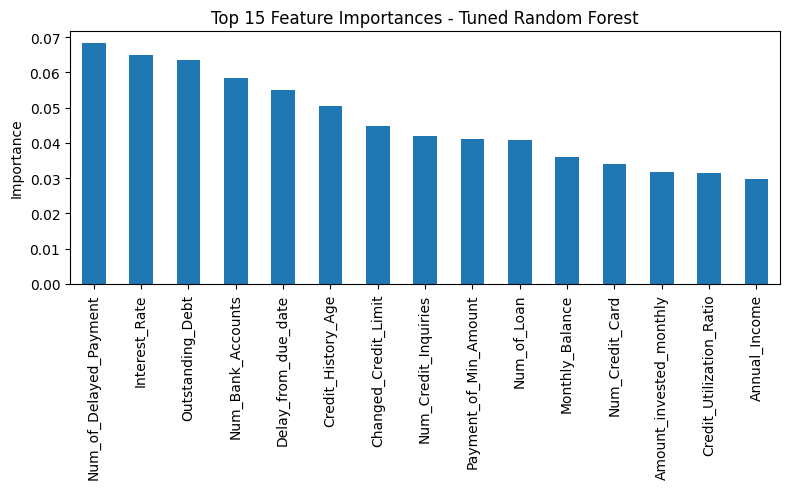

In [33]:
# ===================== 6) MODEL TUNING - RANDOM FOREST ===================== #

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1) Define base model (with class_weight to handle imbalance a bit)
rf_base = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',   # to help minority classes
    n_jobs=-1
)

# 2) Define hyperparameter grid (kept small so it doesn't take forever)
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='accuracy',   # you can also try 'f1_weighted'
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("🔍 Starting Grid Search for Random Forest...")
grid_search.fit(X_train, y_train)

print("\n✅ Grid Search Completed")
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# 3) Get best model
rf_best = grid_search.best_estimator_

# 4) Evaluate tuned model on test set
y_pred_tuned = rf_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred_tuned)
test_prec = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
test_rec = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_pred_tuned, average='weighted', zero_division=0)

print("\n===== TUNED RANDOM FOREST PERFORMANCE ON TEST SET =====")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision (weighted): {test_prec:.4f}")
print(f"Recall (weighted): {test_rec:.4f}")
print(f"F1-score (weighted): {test_f1:.4f}")

print("\n===== CLASSIFICATION REPORT (Tuned RF) =====")
print(classification_report(y_test, y_pred_tuned))

# 5) Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(5, 4))
disp.plot(values_format='d')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

# 6) Feature Importance (Top 15)
importances = rf_best.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)
print("\n===== TOP 15 FEATURE IMPORTANCES (Tuned RF) =====")
print(feat_imp)

plt.figure(figsize=(8, 5))
feat_imp.plot(kind='bar')
plt.title("Top 15 Feature Importances - Tuned Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# ===================== END OF MODEL TUNING ===================== #
